<h2>LangChain & Google Gemini API</h2>
<h5><a href="https://ai.google.dev/">Google AI for Developers</a> | <a href="https://api.python.langchain.com/en/latest/google_genai_api_reference.html">LangChain Google</a></h5> 

In [ ]:
# API KEY using os.environ
'''
import os

llm_key = 'GOOGLE_API_KEY' # OPENAI_API_KEY
os.environ[llm_key] = '##' 
api_key = os.environ[llm_key]
'''

In [1]:
# Read API KEY from file
import json

file_path = 'llms_vault.json'
llm_key = 'GOOGLE_API_KEY'

try:
    with open(file_path,'r') as f:
        api_key = json.loads(f.read()).get(llm_key)
        if not api_key:
            raise ValueError(f"Some issue with '{llm_key}' from '{file_path}'. Verify the key:'{llm_key}' if it exists!")
except FileNotFoundError:
    raise FileNotFoundError(f"File related issue encountered, verify file path and name '{file_path}'")

In [2]:
len(api_key) # api_key

39

<h3>Using Gemini API</h3>

In [3]:
# https://ai.google.dev/api
import google.generativeai as genai

genai.configure(api_key=api_key) # genai.configure(api_key=os.environ[llm_key]) 

# list model names, requirement here is for content generation.
models = [model for model in genai.list_models()]

<h3> Exploring genai using Pandas </h3>

In [10]:
import pandas as pd # for organizing data

In [35]:
# Explore 'genai', listing out some methods with it's description 
# dir(genai)

genai_methods = []
genai_descriptions = []

for method_name in dir(genai):
    if callable(getattr(genai, method_name)): # having doc
        genai_methods.append(method_name)
        method = getattr(genai, method_name)
        genai_descriptions.append(method.__doc__)


df_genai = pd.DataFrame({'Method': genai_methods, 'Description': genai_descriptions})

df_genai


,Method,Description
0,ChatSession,Contains an ongoing conversation with the mode...
1,GenerationConfig,A simple dataclass used to configure the gener...
2,GenerativeModel,\n The `genai.GenerativeModel` class wraps ...
3,chat,Calls the API to initiate a chat with a model ...
4,chat_async,Calls the API to initiate a chat with a model ...
5,configure,Captures default client configuration.\n\n ...
6,count_message_tokens,Calls the API to calculate the number of token...
7,count_text_tokens,Calls the API to count the number of tokens in...
8,create_tuned_model,Calls the API to initiate a tuning process tha...
9,delete_file,Calls the API to permanently delete a specifie...


In [96]:
# Convert genai - models to pandas dataframe.

df = pd.DataFrame(models, columns=['name', 'description', 'supported_generation_methods', 'display_name'])
df.rename(columns={'name': 'model_name'}, inplace=True)

In [101]:
# Exploring the Model DataFrame

df

,model_name,description,supported_generation_methods,display_name
0,models/chat-bison-001,A legacy text-only model optimized for chat co...,"[generateMessage, countMessageTokens]",PaLM 2 Chat (Legacy)
1,models/text-bison-001,A legacy model that understands text and gener...,"[generateText, countTextTokens, createTunedTex...",PaLM 2 (Legacy)
2,models/embedding-gecko-001,Obtain a distributed representation of a text.,"[embedText, countTextTokens]",Embedding Gecko
3,models/gemini-1.0-pro,The best model for scaling across a wide range...,"[generateContent, countTokens]",Gemini 1.0 Pro
4,models/gemini-1.0-pro-001,The best model for scaling across a wide range...,"[generateContent, countTokens, createTunedModel]",Gemini 1.0 Pro 001 (Tuning)
5,models/gemini-1.0-pro-latest,The best model for scaling across a wide range...,"[generateContent, countTokens]",Gemini 1.0 Pro Latest
6,models/gemini-1.0-pro-vision-latest,The best image understanding model to handle a...,"[generateContent, countTokens]",Gemini 1.0 Pro Vision
7,models/gemini-1.5-flash,Fast and versatile multimodal model for scalin...,"[generateContent, countTokens]",Gemini 1.5 Flash
8,models/gemini-1.5-flash-001,Fast and versatile multimodal model for scalin...,"[generateContent, countTokens, createCachedCon...",Gemini 1.5 Flash 001
9,models/gemini-1.5-flash-latest,Fast and versatile multimodal model for scalin...,"[generateContent, countTokens]",Gemini 1.5 Flash Latest


In [98]:
df.describe()

,model_name,description,supported_generation_methods,display_name
count,18,18,18,18
unique,18,10,8,16
top,models/chat-bison-001,Obtain a distributed representation of a text.,"[generateContent, countTokens]",Gemini 1.0 Pro
freq,1,3,9,2


In [99]:
count_models = df.model_name.count()
unique_supported_methods = df.supported_generation_methods.explode().nunique()
print(f"Total model: {count_models}, No of unique supported_methods: {unique_supported_methods}")

Total model: 18, No of unique supported_methods: 12


In [100]:
supported_methods = [method for methods in df['supported_generation_methods'] for method in methods]
count_of_methods = pd.Series(supported_methods).value_counts()
count_of_methods

generateContent         12
countTokens             12
countTextTokens          2
createCachedContent      2
embedContent             2
generateMessage          1
countMessageTokens       1
generateText             1
createTunedTextModel     1
embedText                1
createTunedModel         1
generateAnswer           1
Name: count, dtype: int64

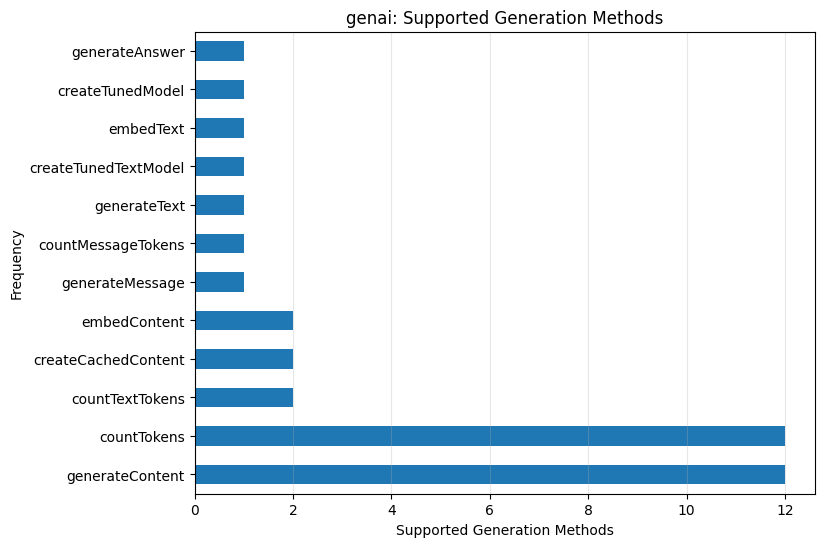

In [87]:
# Plotting pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
count_of_methods.plot(kind='barh')
plt.title('genai: Supported Generation Methods')

plt.xlabel('Supported Generation Methods')
plt.ylabel('Frequency')
plt.grid(axis='x', alpha=0.3)  # Adding faint grid lines

In [5]:
# filter out the 'supported_generation_methods' that contains 'generateContent' only, to be used with 'GenerativeModel'.

content_df = df[df['supported_generation_methods'].apply(lambda x: 'generateContent' in x)]
content_df[['model_name','display_name']]

,model_name,display_name
3,models/gemini-1.0-pro,Gemini 1.0 Pro
4,models/gemini-1.0-pro-001,Gemini 1.0 Pro 001 (Tuning)
5,models/gemini-1.0-pro-latest,Gemini 1.0 Pro Latest
6,models/gemini-1.0-pro-vision-latest,Gemini 1.0 Pro Vision
7,models/gemini-1.5-flash,Gemini 1.5 Flash
8,models/gemini-1.5-flash-001,Gemini 1.5 Flash 001
9,models/gemini-1.5-flash-latest,Gemini 1.5 Flash Latest
10,models/gemini-1.5-pro,Gemini 1.5 Pro
11,models/gemini-1.5-pro-001,Gemini 1.5 Pro 001
12,models/gemini-1.5-pro-latest,Gemini 1.5 Pro Latest


In [16]:
# selecting few random models name. 
selected_models = []
selected_models.extend(content_df.loc[[3,7,10,12]]['model_name']) 
selected_models

['models/gemini-1.0-pro',
 'models/gemini-1.5-flash',
 'models/gemini-1.5-pro',
 'models/gemini-1.5-pro-latest']

<h3> Check the Input/Output token context for selected models.</h3>

In [7]:
for selected_model in selected_models:
    info = genai.get_model(selected_model)
    input_limit = info.input_token_limit
    output_limit = info.output_token_limit
    print(f"Model: {selected_model}, Limits: input-{input_limit}, output-{output_limit}")

Model: models/gemini-1.0-pro, Limits: input-30720 output-2048
Model: models/gemini-1.5-flash, Limits: input-1048576 output-8192
Model: models/gemini-1.5-pro, Limits: input-2097152 output-8192
Model: models/gemini-1.5-pro-latest, Limits: input-2097152 output-8192


<h3>Selecting model for generating content and preparing prompt</h3>


In [104]:
model = genai.GenerativeModel(model_name=selected_models[0]) 

# choosing model, we can also remove the text 'models/' from model text.
# model = genai.GenerativeModel(model_name=selected_models[0].replace('models/',''))

prompts = ["list the colors in the rainbow with words in capital"] # issuing prompt for model chosen. String can also be provided

In [105]:
# Count the tokens, number of tokens for Request!

tokens = model.count_tokens(prompts)
tokens

total_tokens: 10

<h3>Embedding: list of floating point numbers that represent the meaning of a sentence.</h3> 

In [72]:
# embed = genai.embed_content(model=selected_models[0], content=prompts) 

# Code above, will result with "BatchEmbedContentsRequest.requests[0].model: unexpected model name format" ?

In [73]:
# We need the model that supports embedding. 

embed_df = df[df['supported_generation_methods'].apply(lambda e: "embed" in ''.join(e))] # df['supported_generation_methods'] is a []
embed_df['model_name']

2     models/embedding-gecko-001
15          models/embedding-001
16     models/text-embedding-004
Name: model_name, dtype: object

In [119]:
# embed_df['model_name'].loc[15]
embed_model = embed_df['model_name'].loc[15]
embed = genai.embed_content(model=embed_model, content=prompts) 

print(f"Embed model: {embed_model}\
      \n Embedding: {str(embed['embedding'][0][:10])} -(partial),\
      \n Dimension: {len(embed['embedding'][0])}"
      )

Embed model: models/embedding-001      
 Embedding: [0.027544947, -0.045868676, -0.031625714, -0.05262981, 0.053381477, -0.021768298, 0.011543624, -0.019891426, 0.01956483, 0.03539606] -(partial),      
 Dimension: 768


In [106]:
# https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content
response = model.generate_content(prompts) 
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "ROYAL RED\nORANGE OPULENCE\nYELLOW YELL\nGREEN GRANDEUR\nBLUE BRILLIANCE\nINDIGO ILLUMINATION\nVIOLET VIBRANCY"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBL

In [107]:
print(response.text)

ROYAL RED
ORANGE OPULENCE
YELLOW YELL
GREEN GRANDEUR
BLUE BRILLIANCE
INDIGO ILLUMINATION
VIOLET VIBRANCY


<hr/>
<h2>Using LangChain</h2>

In [115]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [109]:
import os
os.environ["GOOGLE_API_KEY"] = api_key

In [110]:
llm = ChatGoogleGenerativeAI(
    google_api_key = api_key,
    model=selected_models[0],
    )

In [121]:
# Embedding

embeddings = GoogleGenerativeAIEmbeddings(model=embed_model)
embeddings.embed_query(prompts[0])

print(f"Embed model: {embed_model}\
      \n Embedding: {str(embed['embedding'][0][:10])} -(partial),\
      \n Dimension: {len(embed['embedding'][0])}"
      )

Embed model: models/embedding-001      
 Embedding: [0.027544947, -0.045868676, -0.031625714, -0.05262981, 0.053381477, -0.021768298, 0.011543624, -0.019891426, 0.01956483, 0.03539606] -(partial),      
 Dimension: 768


In [111]:
gem_response = llm.invoke(prompts[0])

In [112]:
gem_response

AIMessage(content='RED\nORANGE\nYELLOW\nGREEN\nBLUE\nINDIGO\nVIOLET \n', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a1b5ba10-51e1-481c-9c41-703bded29c42-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27})

In [122]:
print(gem_response.content)

RED
ORANGE
YELLOW
GREEN
BLUE
INDIGO
VIOLET 



In [123]:
print(gem_response.usage_metadata)

{'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27}
